# **Credit Score Classification!📈💳**
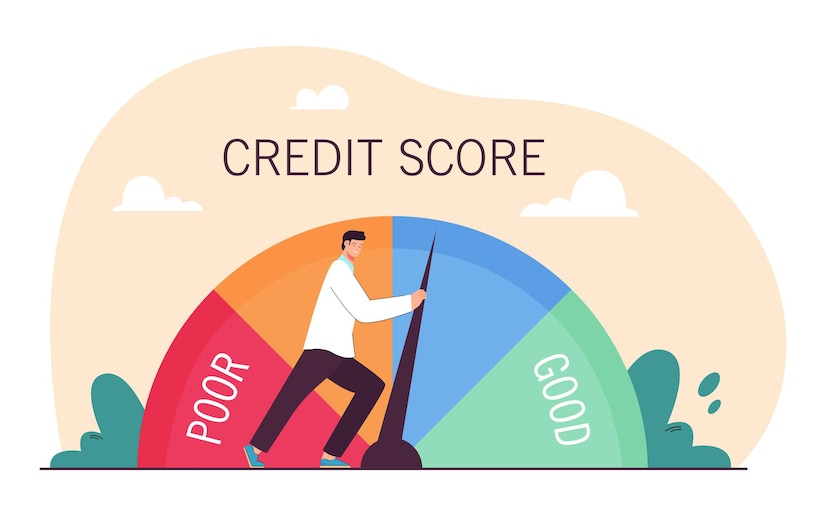

## Introduction

🌐 In today's financial landscape, credit scores play a pivotal role in assessing an individual's creditworthiness. Lenders, ranging from traditional banks to online lending platforms, heavily rely on credit scores to make informed decisions about extending credit. As the demand for credit continues to rise, the need for accurate and efficient credit score classification becomes paramount. Machine learning techniques offer a powerful toolset for analyzing vast amounts of financial data to predict and classify credit scores.

## Project Statement

🛠️ This project aims to explore and implement machine learning algorithms for credit score classification. By leveraging historical credit data, the objective is to train models that can accurately predict credit scores based on various financial and non-financial features.

> 🤖 The project will delve into feature engineering, model selection, and performance evaluation to create a robust and reliable credit scoring system. The ultimate goal is to contribute to the enhancement of credit risk assessment methodologies, providing financial institutions with more precise tools for evaluating potential borrowers. Through this exploration of machine learning in credit scoring, we aim to contribute to the ongoing evolution of the financial industry and promote more efficient and equitable lending practices 📈💳






## About the Dataset


**Dataset Size**

1.   train.csv - 100000 rows
2.   test.csv - 50000 rows

**Columns**

*   ID: Unique identifier for each record in the dataset.

*   Customer_ID: Unique identifier for each customer.
*   Month: The month for which the financial data is recorded.
*   Name: Name of the individual.
*   Age: Age of the individual.
*   SSN: Social Security Number, a unique identifier for individuals in the U.S.
*   Occupation: The occupation or profession of the individual.
*   Annual_Income: Annual income of the individual.
*   Monthly_Inhand_Salary: Net monthly salary after deductions.
*   Num_Bank_Accounts: Number of bank accounts held by the individual.
*   Num_Credit_Card: Number of credit cards owned by the individual.
*   Interest_Rate: Interest rate associated with financial transactions.
*   Num_of_Loan: Number of loans the individual has.
*   Type_of_Loan: The type of loan(s) the individual has.
*   Delay_from_due_date: Delay in payments from the due date.
*   Num_of_Delayed_Payment: Number of delayed payments.
*   Changed_Credit_Limit: Whether there has been a change in credit limit.
*   Num_Credit_Inquiries: Number of credit inquiries made.
*   Credit_Mix: The mix of different types of credit.
*   Outstanding_Debt: Amount of outstanding debt.
*   Credit_Utilization_Ratio: Ratio of credit used to the total credit available.
*   Credit_History_Age: Age of credit history.
*   Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.
*   Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments.
*   Amount_invested_monthly: Amount invested by the individual monthly.
*   Payment_Behaviour: Behavior related to payment patterns.
*   Monthly_Balance: Monthly balance in the account.
*   Credit_Score: The credit score assigned to the individual based on various factors.













## Data Pre-Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("train.csv",low_memory=False)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
print('Train Data Size : ',df.shape)

Train Data Size :  (23557, 28)


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23557 entries, 0 to 23556
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23557 non-null  object 
 1   Customer_ID               23557 non-null  object 
 2   Month                     23557 non-null  object 
 3   Name                      21208 non-null  object 
 4   Age                       23557 non-null  object 
 5   SSN                       23557 non-null  object 
 6   Occupation                23557 non-null  object 
 7   Annual_Income             23557 non-null  object 
 8   Monthly_Inhand_Salary     20024 non-null  float64
 9   Num_Bank_Accounts         23557 non-null  int64  
 10  Num_Credit_Card           23557 non-null  int64  
 11  Interest_Rate             23557 non-null  int64  
 12  Num_of_Loan               23557 non-null  object 
 13  Type_of_Loan              20949 non-null  object 
 14  Delay_

In [ ]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        2349
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3533
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2608
Delay_from_due_date            0
Num_of_Delayed_Payment      1663
Changed_Credit_Limit           0
Num_Credit_Inquiries         466
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2201
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly     1041
Payment_Behaviour              1
Monthly_Balance              298
Credit_Score                   1
dtype: int64

**Dataset consists of missing values.**

In [ ]:
# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3533
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      1663
Changed_Credit_Limit           0
Num_Credit_Inquiries         466
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2201
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly     1041
Payment_Behaviour              1
Monthly_Balance              298
Credit_Score                   1
dtype: int64

**There are still features that comprise of missing values. The categorical features must be converted to numerical in order to fill missing data**

In [ ]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [ ]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 530
Unique values: ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46' '26' '42' '19' '31_' '48' '995' '40_' '37_' '38' '54_'
 '5079' '43' '21_' '22' '6409' '16' '7080' '18' '849' '3885' '20_' '15'
 '27' '43_' '38_' '25' '3052' '14' '5342' '17' '18_' '4431' '2657' '2111_'
 '46_' '47' '1032' '16_' '19_' '47_' '456' '5717' '53_' '53' '56' '25_'
 '27_' '55_' '3169' '1191' '29' '42_' '7140' '48_' '49' '49_' '8233'
 '6955' '2534' '3115' '7657' '51' '50' '5112' '50_' '32_' '6452' '2744'
 '22_' '17_' '1439' '29_' '5795' '4872' '1772' '15_' '1383' '5657' '52'
 '1934' '51_' '8352' '3734' '26_' '2056' '39_' '7508' '2339' '14_' '8406'
 '1424' '36_' '6953' '5626' '4471' '548' '44_' '769' '5490' '525' '4202'
 '3665' '7

In [ ]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

## Data Encoding (Categorical ---> Numerical)

In [ ]:
df["Month"].value_counts()

July        2257
March       2203
January     2192
February    2185
August      2184
May         2179
June        2179
April       2169
Name: Month, dtype: int64

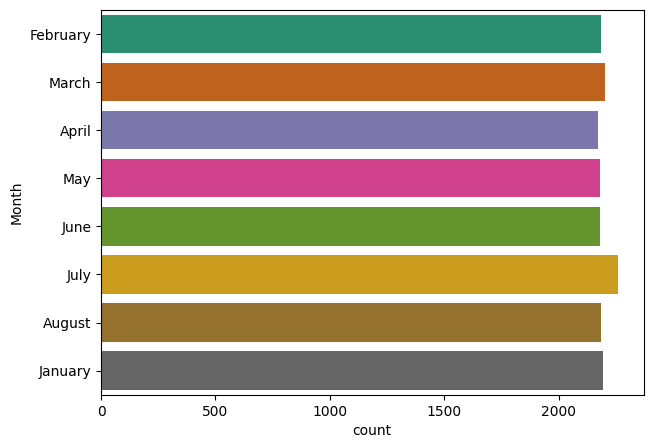

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()

In [ ]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [ ]:
df["Occupation"].value_counts()

Mechanic         1293
Doctor           1238
Media_Manager    1229
Teacher          1213
Journalist       1205
Entrepreneur     1194
Writer           1187
Developer        1172
Lawyer           1154
Scientist        1146
Architect        1133
Engineer         1130
Manager          1101
Musician         1090
Accountant       1063
Name: Occupation, dtype: int64

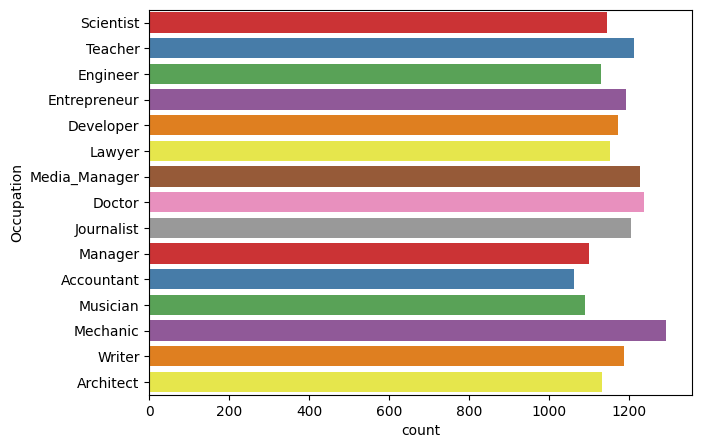

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [ ]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [ ]:
df["Credit_Mix"].value_counts()

Standard    7895
Good        5354
Bad         4299
Name: Credit_Mix, dtype: int64

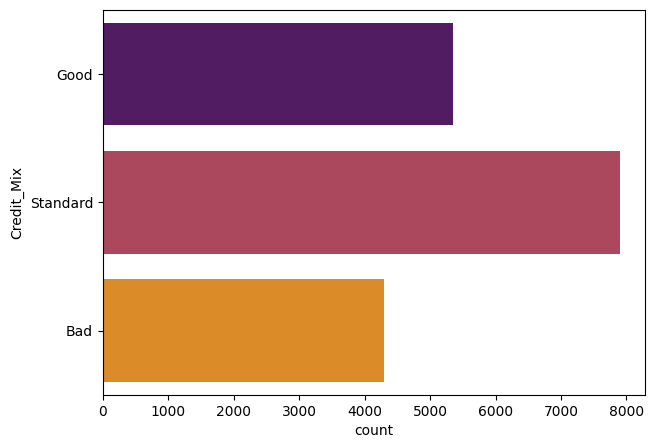

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="inferno")
plt.show()

In [ ]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [ ]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      4463
High_spent_Medium_value_payments    3116
Low_spent_Medium_value_payments     2445
High_spent_Large_value_payments     2350
High_spent_Small_value_payments     2050
Low_spent_Large_value_payments      1817
!@9#%8                              1306
Name: Payment_Behaviour, dtype: int64

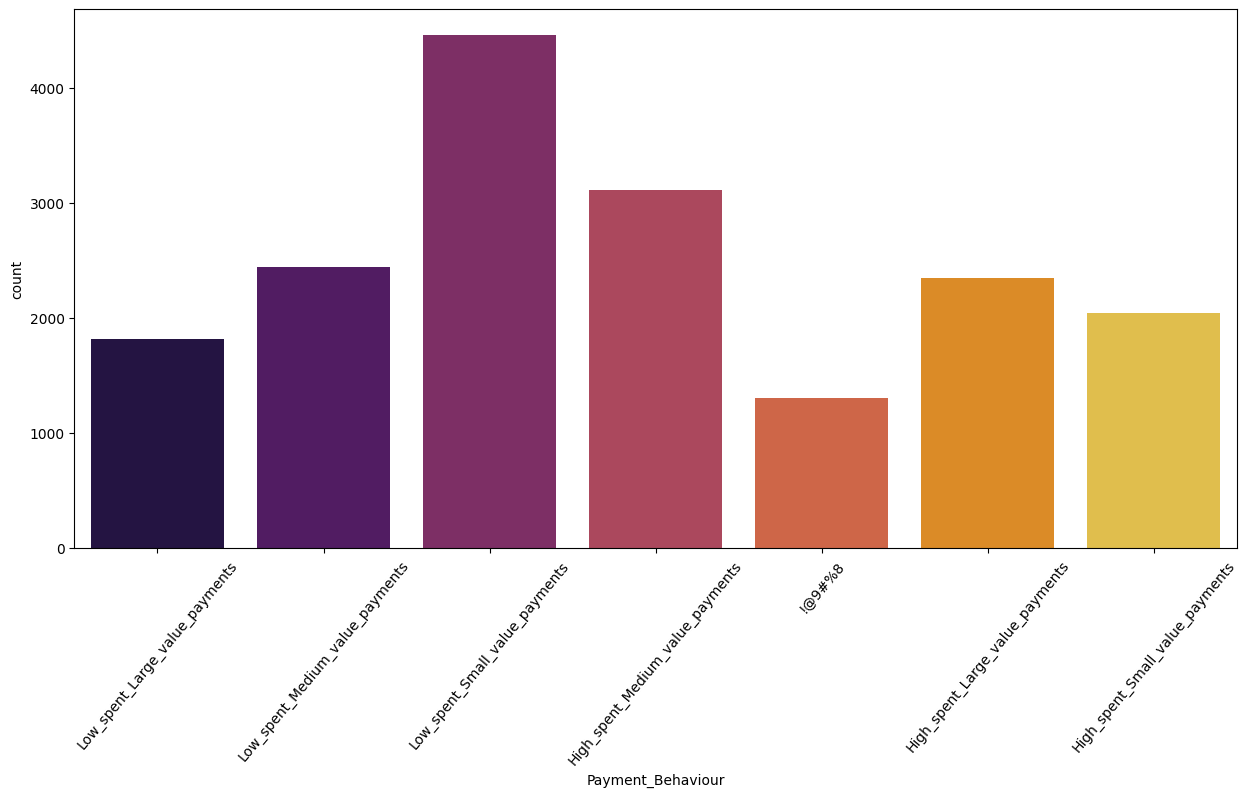

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=50)
plt.show()

In [ ]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [ ]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [ ]:
df["Payment_of_Min_Amount"].value_counts()

Yes    9336
No     6126
NM     2085
Name: Payment_of_Min_Amount, dtype: int64

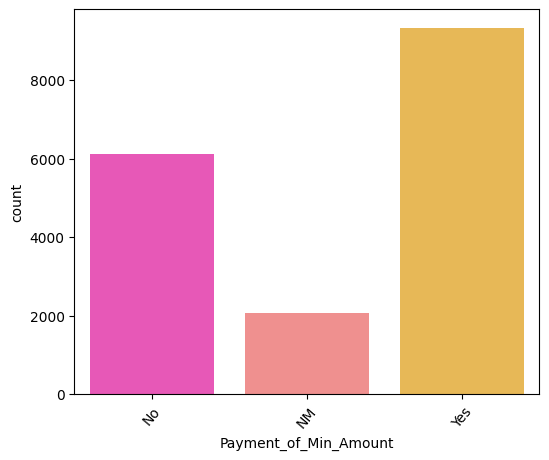

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [ ]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [ ]:
df["Credit_Score"].value_counts()

Standard    9310
Poor        5127
Good        3110
Name: Credit_Score, dtype: int64

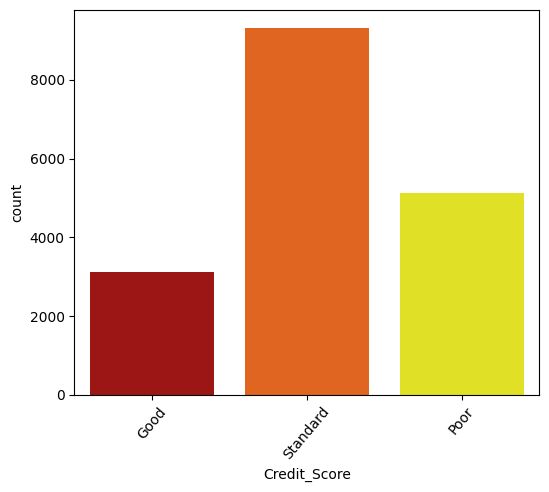

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [ ]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

## Handling Missing Data


In [ ]:
df.isnull().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       2628
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      1246
Changed_Credit_Limit           0
Num_Credit_Inquiries         359
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1628
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly      763
Payment_Behaviour           1307
Monthly_Balance              217
Credit_Score                   1
dtype: int64

In [ ]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [ ]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [ ]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [ ]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

In [ ]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [ ]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)

In [ ]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [ ]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**All missing values have been handled**

In [ ]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [ ]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [ ]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [ ]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

## Data Visualization

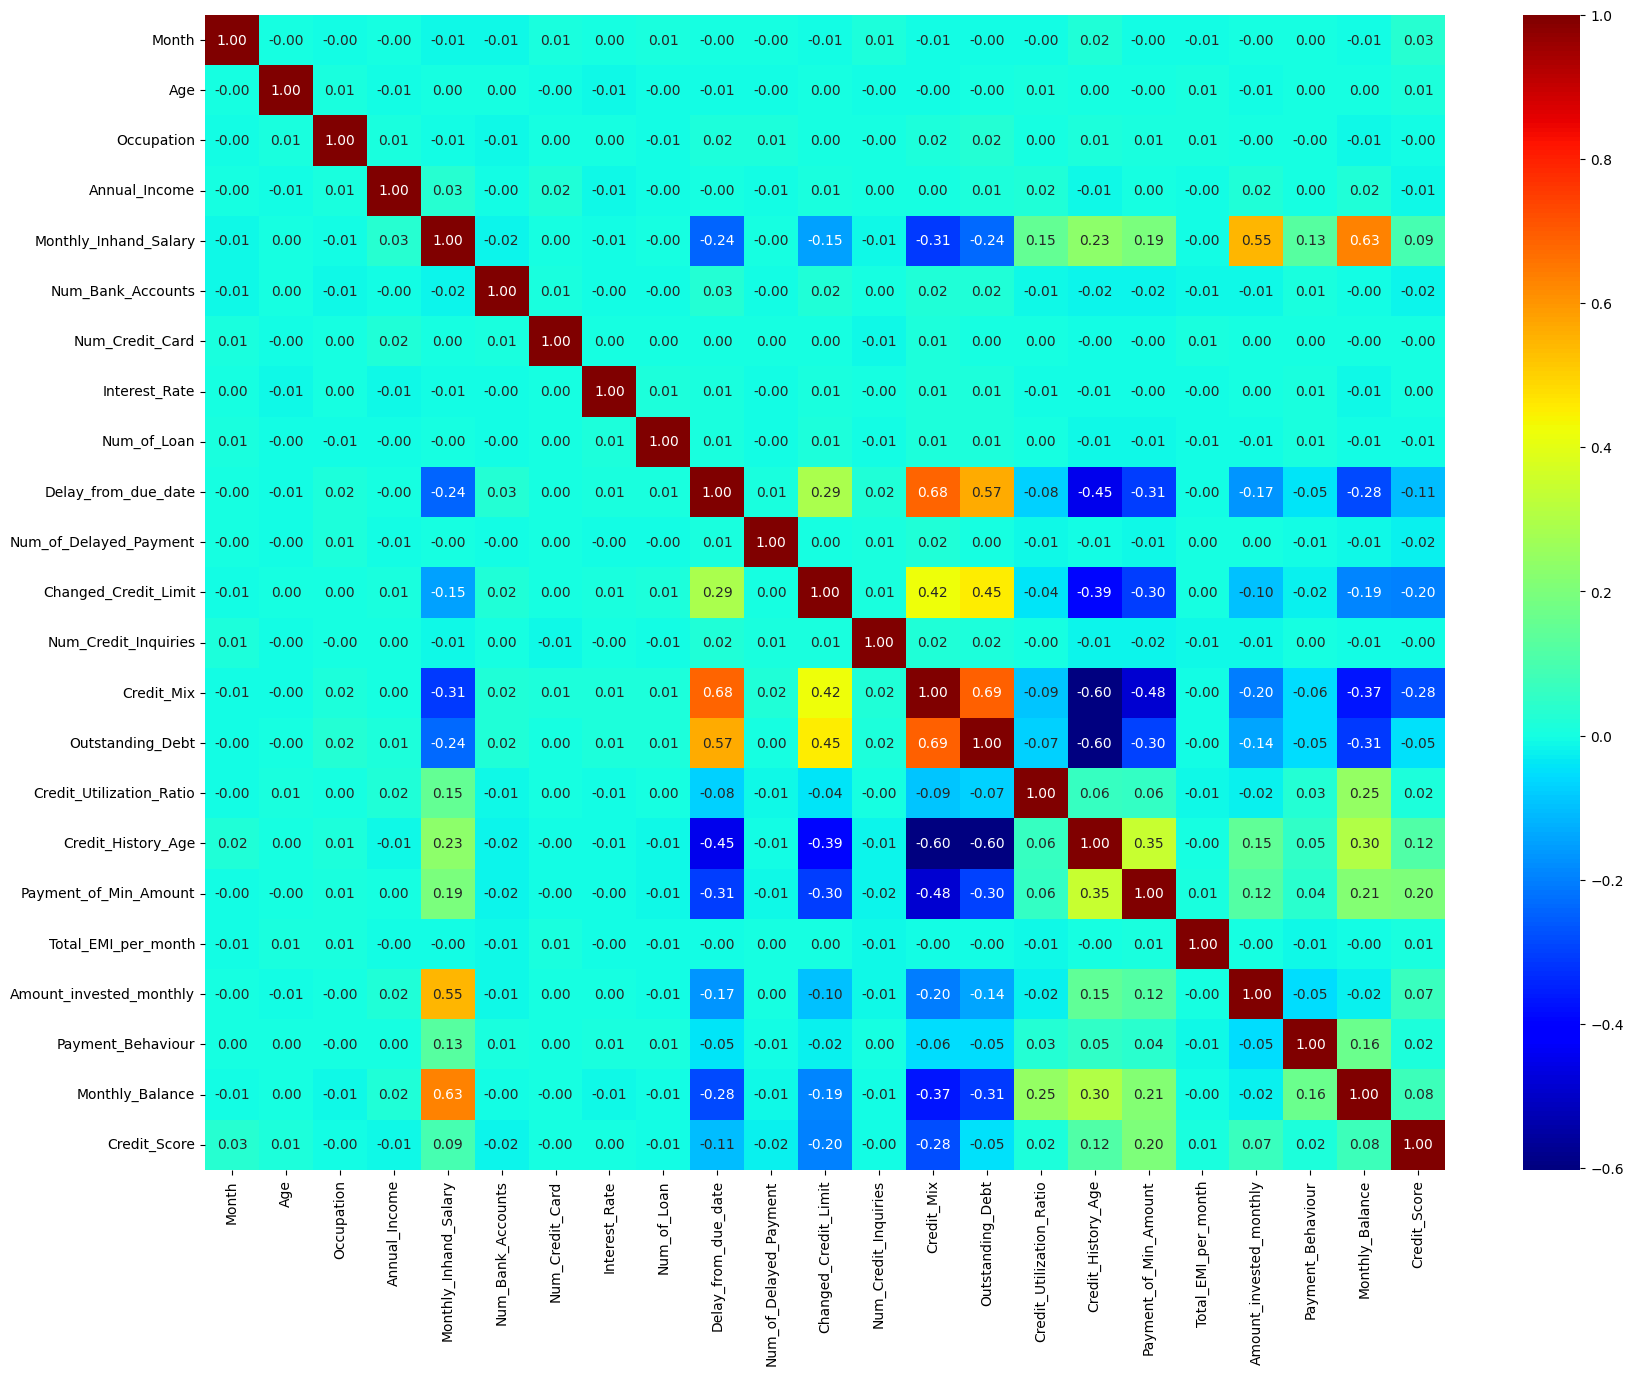

In [ ]:
cr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

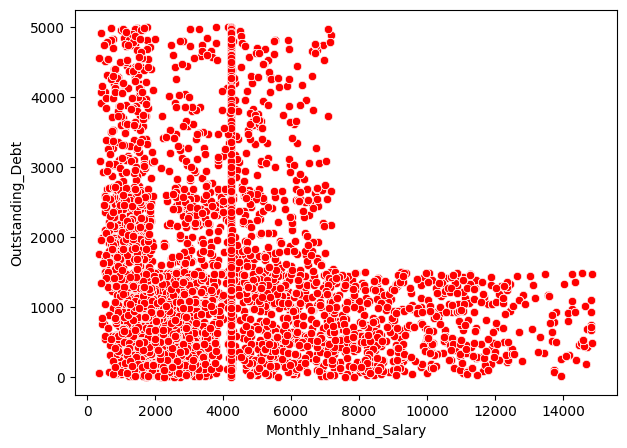

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

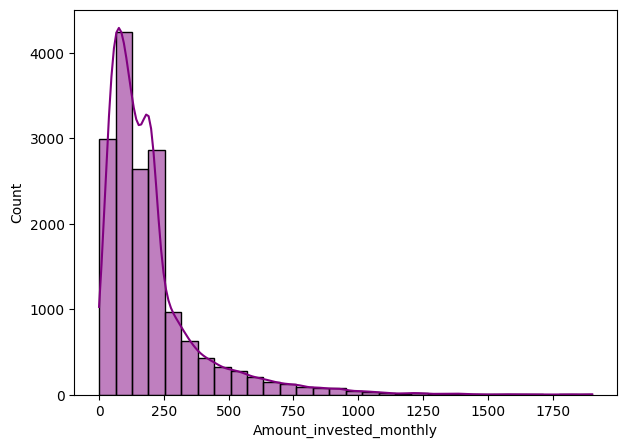

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="purple")
plt.show()

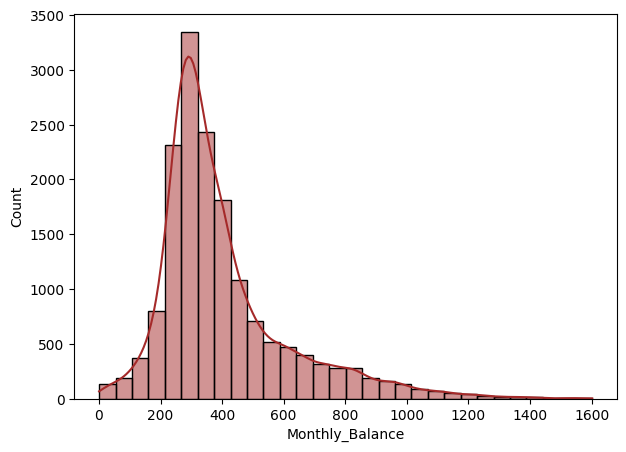

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="brown")
plt.show()

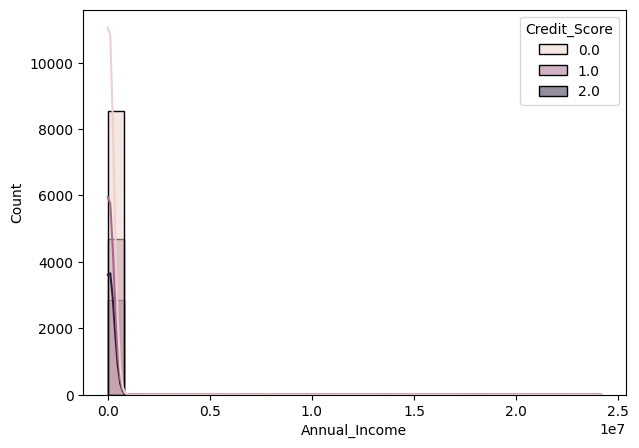

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

## Data Scaling


In [ ]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

We will be training the dataset on 2 different models:

1.   Extreme Gradient Boosting Classifier
2.   Light Gradient Boosting Machine



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Extreme Gradient Boosting Classifier

In [ ]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.7039088950446292


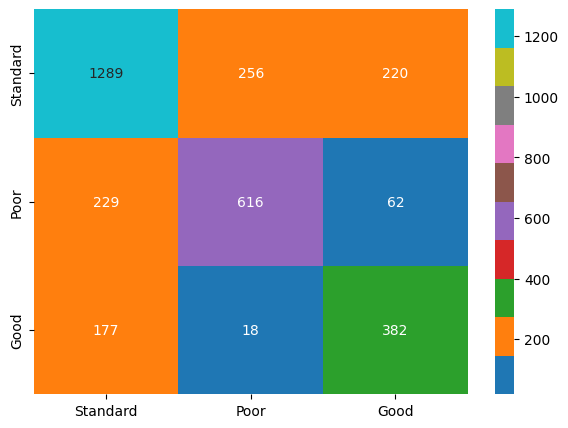

In [ ]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [ ]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.76      0.73      0.75      1765
        Poor       0.69      0.68      0.69       907
        Good       0.58      0.66      0.62       577

    accuracy                           0.70      3249
   macro avg       0.68      0.69      0.68      3249
weighted avg       0.71      0.70      0.71      3249



In [ ]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.653367544600754


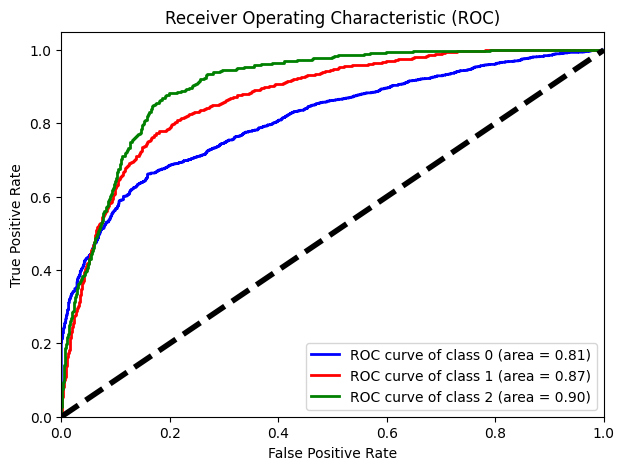

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### LightGBM (Light Gradient Boosting Machine)

In [ ]:
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,

                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')

In [ ]:
lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 12992, number of used features: 22
[LightGBM] [Info] Start training from score -0.639793
[LightGBM] [Info] Start training from score -1.219382
[LightGBM] [Info] Start training from score -1.730555


LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=42)

In [ ]:
pred0=lgb_classifier.predict(xtest)
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7590027700831025


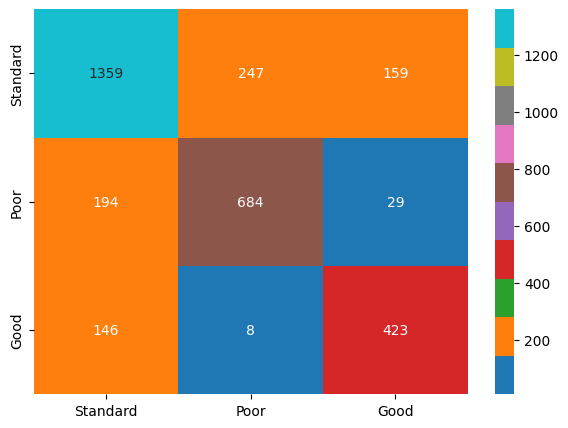

In [ ]:
cf_mat=confusion_matrix(ytest, pred0)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))
sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [ ]:
print(classification_report(ytest,pred0,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.80      0.77      0.78      1765
        Poor       0.73      0.75      0.74       907
        Good       0.69      0.73      0.71       577

    accuracy                           0.76      3249
   macro avg       0.74      0.75      0.75      3249
weighted avg       0.76      0.76      0.76      3249



In [ ]:
lgb=lgb_classifier.predict_proba(xtest)
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.5606430088757401


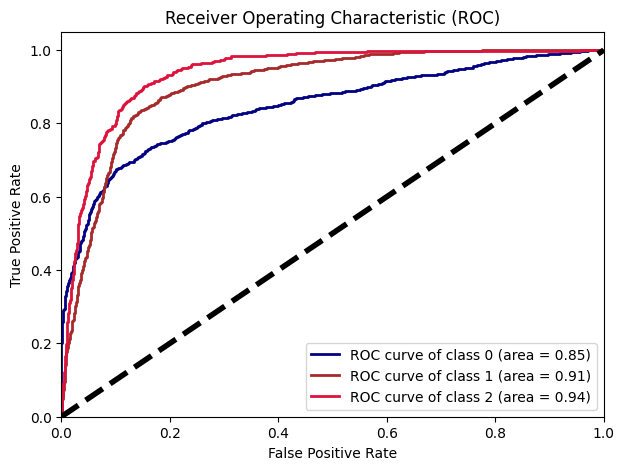

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Model Evaluation

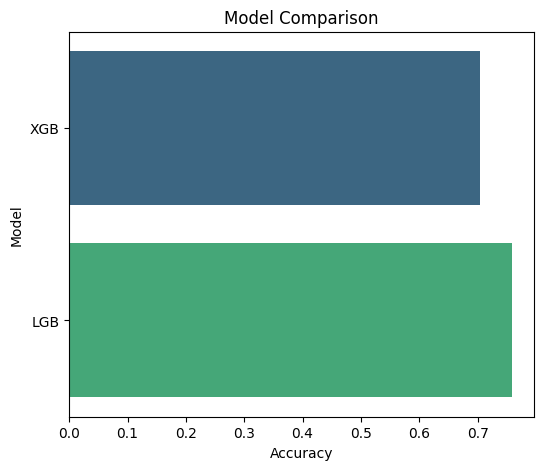

In [ ]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()


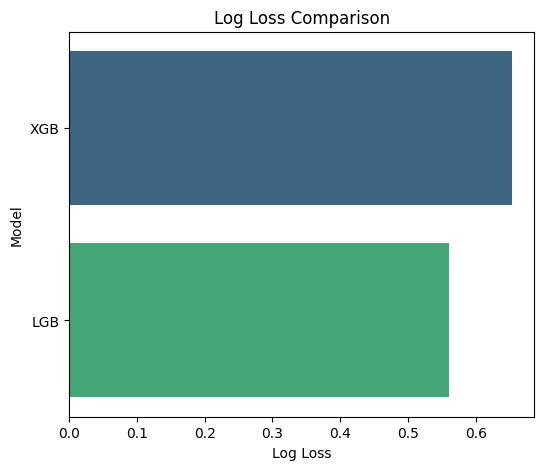

In [ ]:
log_loss_results = {'XGB': logloss, 'LGB': logloss2}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()


In [ ]:
from xgboost import XGBClassifier
import joblib

# Assuming you have your trained XGBoost model in the xgb_classifier variable
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)  # Train the model, replace with your actual training data

# Save the model as a pkl file
model_filename = "xgb_model.pkl"
joblib.dump(xgb_classifier, model_filename)

print(f"XGBoost model saved as {model_filename}")


### **Hence, LGBM is the most feasible model to train this dataset.**

## Model Saving

In [ ]:
from lightgbm import LGBMClassifier
import joblib

# Assuming you have your trained LGBMClassifier in the lgb_classifier variable
lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',  # Multi-class objective
    metric='multi_logloss'
)

# Train the model (replace with your actual training data)
lgb_classifier.fit(xtrain, ytrain)

# Save the LGBMClassifier as a pkl file
model_filename = "lgb_model.pkl"
joblib.dump(lgb_classifier, model_filename)

print(f"LGBMClassifier model saved as {model_filename}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 12992, number of used features: 22
[LightGBM] [Info] Start training from score -0.639793
[LightGBM] [Info] Start training from score -1.219382
[LightGBM] [Info] Start training from score -1.730555
LGBMClassifier model saved as lgb_model.pkl
